In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import io

In [2]:
url = '../data/alta-noaa-1980-2019.csv'
alta = pd.read_csv(url)


array([[<Axes: title={'center': 'SNWD'}>]], dtype=object)

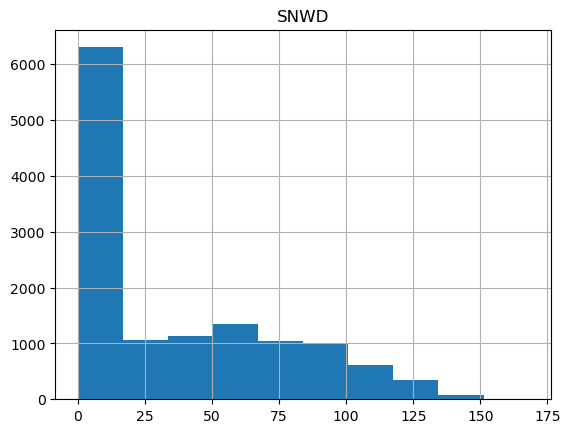

In [8]:
# Histogram of Snow Depth (SNWD)
alta.hist(column='SNWD')

<Axes: xlabel='TOBS', ylabel='SNOW'>

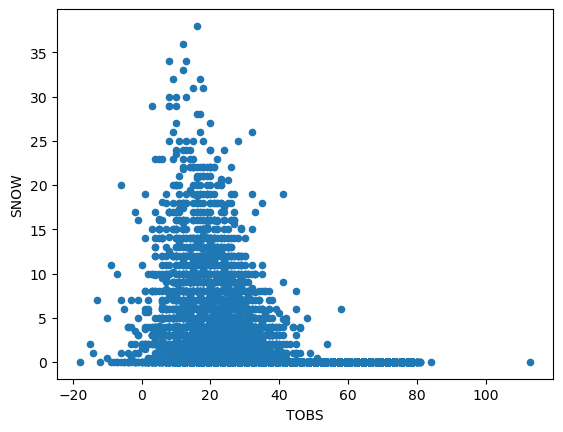

In [9]:
# Scatterplot Snofall (SNOW) by Temperature at Snowfall (TOBS)
alta.plot.scatter(x = 'TOBS', y = 'SNOW')

In [3]:
def tweak_alta(df):
  return (df
          .assign(SNOWDATE=pd.to_datetime(df['DATE']))
         )

alta_tw = tweak_alta(alta[['DATE', 'SNOW', 'SNWD','TMIN', 'TOBS', 'TMAX']])
alta_tw

,DATE,SNOW,SNWD,TMIN,TOBS,TMAX,SNOWDATE
0,1980-01-01,2.0,29.0,25.0,25.0,38.0,1980-01-01
1,1980-01-02,3.0,34.0,18.0,18.0,27.0,1980-01-02
2,1980-01-03,1.0,30.0,12.0,18.0,27.0,1980-01-03
3,1980-01-04,0.0,30.0,18.0,27.0,31.0,1980-01-04
4,1980-01-05,0.0,30.0,26.0,34.0,34.0,1980-01-05
...,...,...,...,...,...,...,...
14155,2019-09-03,0.0,0.0,57.0,73.0,74.0,2019-09-03
14156,2019-09-04,0.0,0.0,52.0,74.0,77.0,2019-09-04
14157,2019-09-05,0.0,0.0,54.0,65.0,76.0,2019-09-05
14158,2019-09-06,0.0,0.0,52.0,60.0,66.0,2019-09-06


<Axes: xlabel='MONTH'>

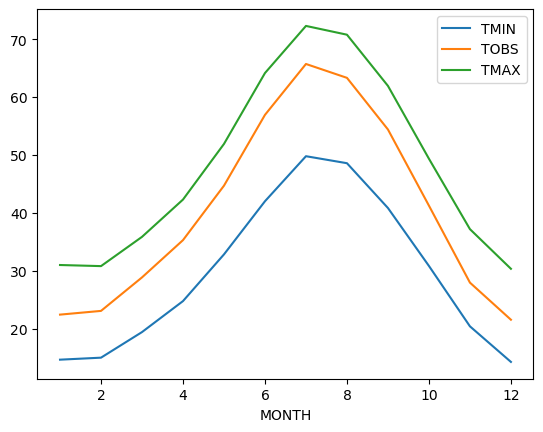

In [4]:
# plot
alta_tw['MONTH'] = pd.DatetimeIndex(alta_tw['SNOWDATE']).month
alta_tw2 =  alta_tw.groupby(['MONTH'])[['TMIN', 'TOBS','TMAX']].mean().reset_index()
alta_tw2.plot('MONTH',['TMIN','TOBS','TMAX'])

<Axes: xlabel='SNWD', ylabel='Count'>

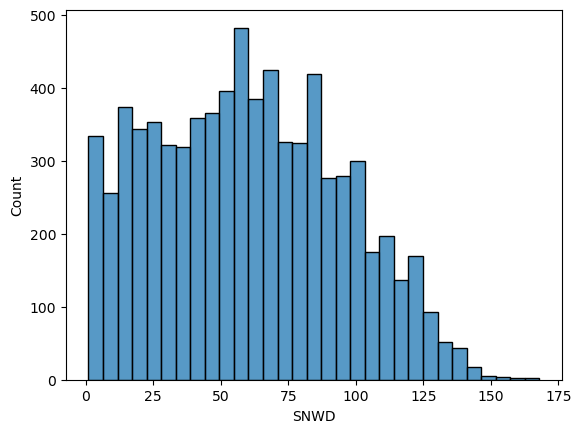

In [7]:
# Seaborn Examples
# Histogram of Snow Depth (SNWD)
alta_filt = alta[alta.SNWD > 0]
sns.histplot(data=alta_filt, x='SNWD')


<Axes: xlabel='TOBS', ylabel='SNOW'>

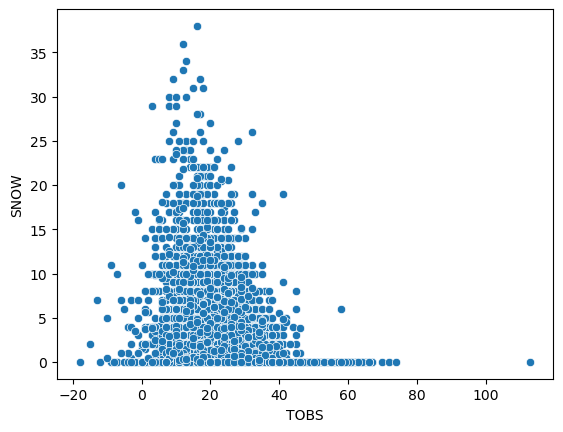

In [8]:
# Scatterplot Snofall (SNOW) by Temperature at Snowfall (TOBS)
sns.scatterplot(data=alta_filt, x='TOBS', y='SNOW')

In [5]:
# Line plots 1) Minimum temperature (TMIN) 2) Observation temperature (TOBS) 3) Maximum Temperature by Date (DATE)
# convert alta_tw to long form
alta_long = pd.melt(
    alta_tw2,
    id_vars=["MONTH"],
    value_vars=["TMIN", "TOBS", "TMAX"],
    var_name="Temperature",
    value_name="Degrees")

alta_long

,MONTH,Temperature,Degrees
0,1,TMIN,14.650206
1,2,TMIN,14.996403
2,3,TMIN,19.417090
3,4,TMIN,24.769369
4,5,TMIN,32.837248
5,6,TMIN,42.015666
6,7,TMIN,49.794118
7,8,TMIN,48.584629
8,9,TMIN,40.845389
9,10,TMIN,30.838287


<Axes: xlabel='MONTH', ylabel='Degrees'>

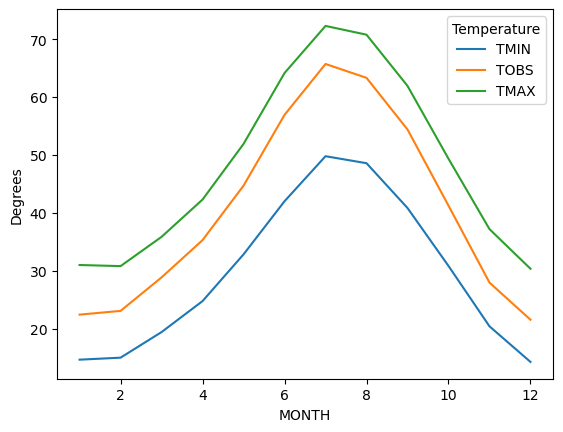

In [7]:
# Seaborn Line Plot
sns.lineplot(data=alta_long, x='MONTH', y='Degrees', hue='Temperature')